In [1]:
pip install matplotlib pandas


Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
Note: you may need to restart the kernel to use updated packages.


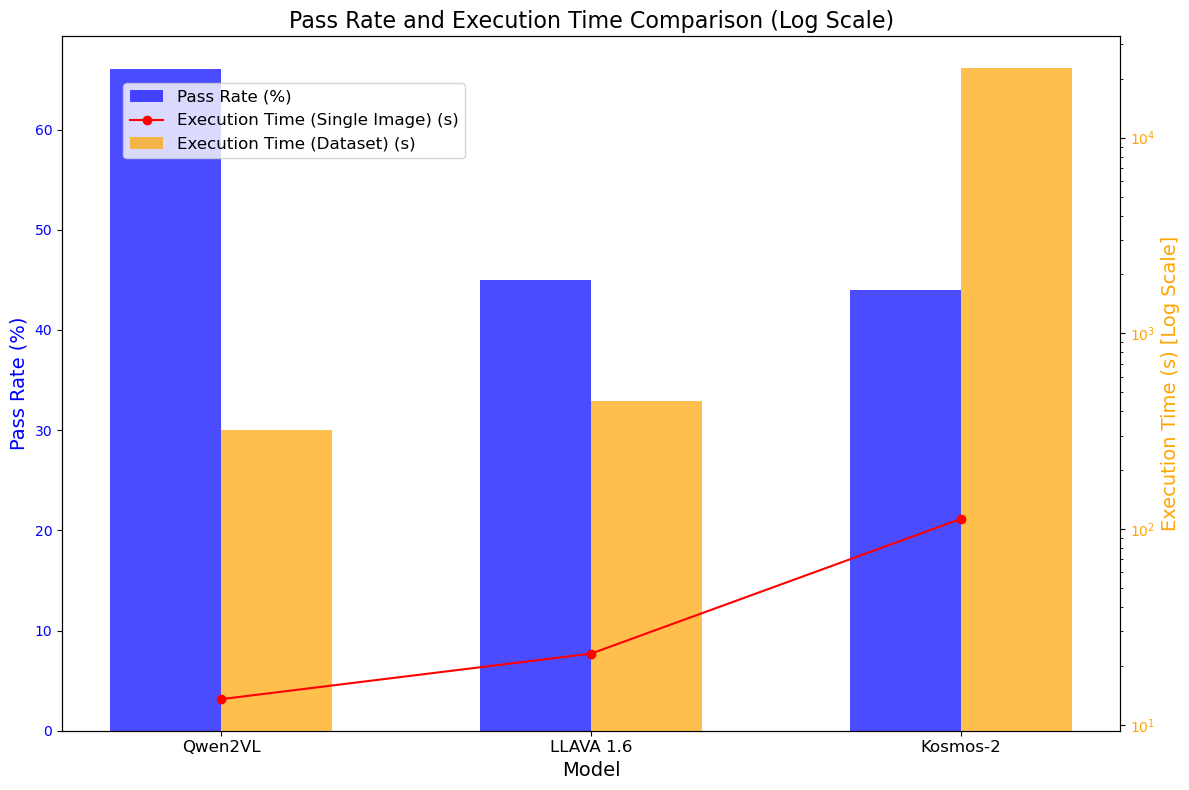

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the chart
chart_data = {
    "Model": ["Qwen2VL", "LLAVA 1.6", "Kosmos-2"],
    "Pass Rate (%)": [66, 45, 44],
    "Execution Time (Dataset) (s)": [320, 450, 22722],
    "Execution Time (Single Image) (s)": [13.51, 23.10, 112.85]
}

chart_df = pd.DataFrame(chart_data)

# Create a dual-axis chart with a logarithmic scale for execution times
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for Pass Rate
x = range(len(chart_df["Model"]))
bar_width = 0.3
ax1.bar(
    [pos - bar_width / 2 for pos in x],
    chart_df["Pass Rate (%)"],
    width=bar_width,
    label="Pass Rate (%)",
    alpha=0.7,
    color="blue"
)

# Add a secondary axis for Execution Times with a logarithmic scale
ax2 = ax1.twinx()

# Bar for Dataset Execution Time
ax2.bar(
    [pos + bar_width / 2 for pos in x],
    chart_df["Execution Time (Dataset) (s)"],
    width=bar_width,
    label="Execution Time (Dataset) (s)",
    alpha=0.7,
    color="orange",
    log=True  # Logarithmic scale
)

# Line plot for Single Image Execution Time
ax2.plot(
    x,
    chart_df["Execution Time (Single Image) (s)"],
    color="red",
    marker="o",
    label="Execution Time (Single Image) (s)"
)

# Add labels and titles
ax1.set_xlabel("Model", fontsize=14)
ax1.set_ylabel("Pass Rate (%)", fontsize=14, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticks(x)
ax1.set_xticklabels(chart_df["Model"], fontsize=12)
ax2.set_ylabel("Execution Time (s) [Log Scale]", fontsize=14, color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add a title and legend
plt.title("Pass Rate and Execution Time Comparison (Log Scale)", fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=12)
plt.tight_layout()

# Show the chart
plt.show()
